## Background about the dataset

We have 4 independent variables (`float`) for each molecule. We can use a linear combination of these 4 independent variables to predict the bandgap (dependent variable) of each molecule.

More about the problem is at [Li et al, Bandgap tuning strategy by cations and halide ions of lead halide perovskites learned from machine learning, RSC Adv., 2021,11, 15688-15694](https://doi.org/10.1039/D1RA03117A).

In [1]:
import csv
import random
import numpy as np

In [2]:
all_molecules = list()

with open('bg_data.txt', 'r') as infile:
    input_rows = csv.DictReader(infile)
    
    for row in input_rows:
        current_mol = ([float(row['Cs']), float(row['FA']), float(row['Cl']), float(row['Br'])], float(row['Bandgap']))
        all_molecules.append(current_mol)

random.shuffle(all_molecules)


num_train = int(len(all_molecules) * 0.8)

# each point in x_train has 4 values - 1 for each feature
x_train = [x[0] for x in all_molecules[:num_train]]
# each point in y_train has 1 value - the bandgap of the molecule
y_train = [x[1] for x in all_molecules[:num_train]]

x_test = [x[0] for x in all_molecules[num_train:]]
y_test = [x[1] for x in all_molecules[num_train:]]

As part of linear regression, we attempt to model a relationship between the input data and labels making use of a linear approach.
The input molecular data is of four dimension, making the resultant line to be be of the form $w_0+w_1*x_1+w_2*x_2+w_3*x_3+w_4*x_4$
<br>where w_0, w_1, w_2, w_3, w_4 are the required co-efficients while x_n represents the input datapoints.
<br>
We make use of the gradient descent method to obtain ideal values of the co-efficients.
<br>
We thus first set default values, setting them all to be 1.
<br>
Our aim is to move towards co-efficient values for whom the loss-function returns the least value.
<br>
The loss function makes use of the mean square error to determine how well the linear model generated fits the data.
<br>
So for a co-efficient $w_n$, its updated value would come out as 
<br>
$w_n-lr$ * deriviative of loss function) wrt $w_n$
<br>
where $lr$ is the learning rate
<br>
Proceeding thus for al the co-efficients, after a reasonable amount of iterations we come upon close to ideal values.

<!-- your answer to 1.1.1 -->

In [3]:
#function for determining output for a given set of coefficients and values
def out_func(a,b,c,d,w_use):
    return w_use[0]+w_use[1]*a+w_use[2]*b+w_use[3]*c + w_use[4]*d

In [4]:
#loss function
def loss_func(w):
    count=0
    error=0
    for i in x_train:
        expected=y_train[count]
        obtained=out_func(i[0],i[1],i[2],i[3],w)
        error+=(obtained-expected)**2
        count=count+1
    error=error/count
    return error          

In [5]:
def derivative_0(w):
    count=0
    deriv=0
    for i in x_train:
        expected=y_train[count]
        obtained=out_func(i[0],i[1],i[2],i[3],w)
        deriv+=(obtained-expected)
        count=count+1
    deriv=deriv*2
    deriv=deriv/count
    return deriv

def derivative_1(w):
    count=0
    deriv=0
    for i in x_train:
        expected=y_train[count]
        obtained=out_func(i[0],i[1],i[2],i[3],w)
        deriv+=i[0]*(obtained-expected)
        count=count+1
    deriv=deriv*2
    deriv=deriv/count
    return deriv

def derivative_2(w):
    count=0
    deriv=0
    for i in x_train:
        expected=y_train[count]
        obtained=out_func(i[0],i[1],i[2],i[3],w)
        deriv+=i[1]*(obtained-expected)
        count=count+1
    deriv=deriv*2
    deriv=deriv/count
    return deriv

def derivative_3(w):
    count=0
    deriv=0
    for i in x_train:
        expected=y_train[count]
        obtained=out_func(i[0],i[1],i[2],i[3],w)
        deriv+=i[2]*(obtained-expected)
        count=count+1
    deriv=deriv*2
    deriv=deriv/count
    return deriv

def derivative_4(w):
    count=0
    deriv=0
    for i in x_train:
        expected=y_train[count]
        obtained=out_func(i[0],i[1],i[2],i[3],w)
        deriv+=i[3]*(obtained-expected)
        count=count+1
    deriv=deriv*2
    deriv=deriv/count
    return deriv

In [6]:
min_loss_func=100
w=[1,1,1,1,1]
for j in range(1,100):

    learning_rate =j/1000
    for i in range(100):
        w[0]=w[0]-learning_rate*derivative_0(w)
        w[1]=w[1]-learning_rate*derivative_1(w)
        w[2]=w[2]-learning_rate*derivative_2(w)
        w[3]=w[3]-learning_rate*derivative_3(w)
        w[4]=w[4]-learning_rate*derivative_4(w)
        
    if loss_func(w)<min_loss_func:
        min_loss_func=loss_func(w)
        best_w=w
        best_learning_rate=learning_rate
        
print("The learning rate which resulted in the lowest MSE value is: "+str(best_learning_rate))
print("The resultant lowest MSE value obtained is" + str(min_loss_func))
print("The most suitable co-efficients obtained are"+str(best_w))
    
        

The learning rate which resulted in the lowest MSE value is: 0.081
The resultant lowest MSE value obtained is0.005747773444336091
The most suitable co-efficients obtained are[1.6105976092356586, -0.018196638649458866, -0.13548440828202216, 1.531018036649007, 0.6280742300908622]


In [7]:
y_pred=[]
for i in x_test:    
    result=out_func(i[0],i[1],i[2],i[3],best_w)
    y_pred.append(result)

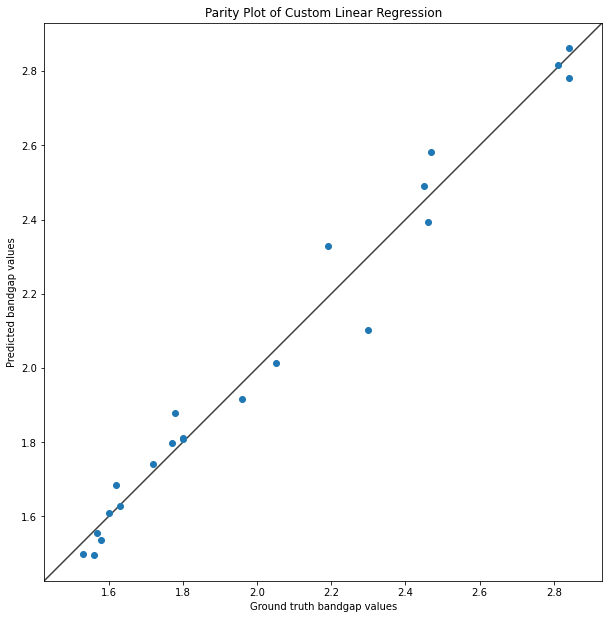

In [8]:

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,20))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth bandgap values')
ax.set_ylabel('Predicted bandgap values')
plt.show()

### Ridge regression


Ridge regression is employed to correct a model which suffers from multicollinearity due to overfitting, wheree independent variables are so closely related. When this happens, the model often performs poorly on testing data that is even slightly varied fmor the training data.

Ridge regression helps remedy this by penalizing overfitting - when the slope of the model on the training data is too high.
So rather than simply minimizing the mean square error, now the minimum of $(MSE + alpha*(slope)^2)$ is minimized.


<!-- Your answer to 1.2.1 -->

In [9]:
# you should not have imported sklearn before this point
import sklearn
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import math


    



# implement Ridge regression and make a table where you explore the effect of different values of `alpha`

alpha_values=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

print("Alpha"+"\t"+"RMSE")

for i in alpha_values:

    pipeline = make_pipeline(StandardScaler(), Ridge(alpha=i))
    pipeline.fit(x_train, y_train)

    y_train_pred = pipeline.predict(x_train)
    y_test_pred = pipeline.predict(x_test)

    
    print(str(i)+"\t"+str(math.sqrt(mean_squared_error(y_test, y_test_pred))))

Alpha	RMSE
0.0001	0.06986568998177588
0.001	0.06986611613451214
0.01	0.06987039334391928
0.1	0.06991472708492434
1	0.07050770026052622
10	0.08583038278571804
100	0.23185743998341715
1000	0.4056444609246328
10000	0.4445290589572261


$Alpha$ represents the magnitude of the penalty which will be imposed on overfitting, part of 
<br>
 $min(MSE+alpha∗(slope)^2)$
<br>
A higher value of penalty would thus reduce the root mean square error on the data as it would prevent the model from fitting, ie. reduce the rmse loss function to a greater extent.
<br>
We can thus observe the rmse value increase as alpha increases.

### Lasso regression


Similar to ridge regression, lasso regreesion also attempts to help avoid models which overfit the training and data and result in overfitting, so as to enable the model to perform better against varied training data.
<br>
It similarly introduces a bias term in the traditional MSE function. However instead of squaring the slope, it takes its absolute value, resulting in minimizing 
<br>
$(MSE + alpha*abs(slope))$ .
<br>
Lasso regression has the further advantage of being able to reduce the slope to zero and is useful for feature selection.

In [10]:
import sklearn
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import math

alpha_values=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

print("Alpha"+"\t"+"RMSE")

for i in alpha_values:

    pipeline = make_pipeline(StandardScaler(), Lasso(alpha=i))
    pipeline.fit(x_train, y_train)

    y_train_pred = pipeline.predict(x_train)
    y_test_pred = pipeline.predict(x_test)

    
    print(str(i)+"\t"+str(math.sqrt(mean_squared_error(y_test, y_test_pred))))

Alpha	RMSE
0.0001	0.06986246394248338
0.001	0.06985735543965566
0.01	0.07030314216685174
0.1	0.17347789266203523
1	0.4494104823490742
10	0.4494104823490742
100	0.4494104823490742
1000	0.4494104823490742
10000	0.4494104823490742


$Alpha$ represents the magnitude of the penalty which will be imposed on overfitting, part of 

 $min(MSE+alpha∗abs(slope))$

Again, the higher the value of penalty is, the higher the rmse is as close fitting is discouraged.

However we also notice that in contrast to Ridge regression, the RMSE values increase at a faster rate as the value of alpha is increased. For instance although the RMSE values at 0.0001 and 10000 are similar, the RMSE value for ridge regression at 0.1 is around 0.06 while it is around 0.16 for lasso regression. This may be due to the variations in the formulae, where due to the square term in the ridge equation, the influence of alpha values lesser than 1 is decreased as compared to lasso regression.